In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.load("simulated_large_A.npy")
x_flat = np.load("simulated_large_x.npy")

In [3]:
A.shape, x_flat.shape

((3108, 2500), (2500,))

In [6]:
Ax = A@x_flat
y = np.random.poisson(Ax).reshape(len(A[:, 0]))
N, M = A.shape

print("Image vector x is of shape {}".format(np.shape(x_flat)))
print("Mixing matrix A is of shape {}".format(np.shape(A)))
print("Observation matrix Y is of shape {}".format(np.shape(y)))
print(f"M={M}, N={N}")

Image vector x is of shape (2500,)
Mixing matrix A is of shape (3108, 2500)
Observation matrix Y is of shape (3108,)
M=2500, N=3108


In [14]:
x_et, diff, mse, step = mle_em(100, A, y)

step: 0, diff: 3852.9287154299577, mse: 1481.6489379363384
step: 1, diff: 239.07995619466607, mse: 1362.6899482719655
step: 2, diff: 146.54551973989464, mse: 1283.1207391362934
step: 3, diff: 106.49011642760752, mse: 1219.8361733350876
step: 4, diff: 85.7723614370583, mse: 1165.8964610276946
step: 5, diff: 73.20595434376868, mse: 1118.5928358227402
step: 6, diff: 64.50284708393981, mse: 1076.5811955527197
step: 7, diff: 57.873579508267284, mse: 1039.0402543404894
step: 8, diff: 52.501109420180214, mse: 1005.3851945898782
step: 9, diff: 47.97305761367315, mse: 975.1570654541713
step: 10, diff: 44.05922017874083, mse: 947.9744765699625
step: 11, diff: 40.618859039065896, mse: 923.5098121450085
step: 12, diff: 37.55915280163587, mse: 901.4761459262205
step: 13, diff: 34.815036761619844, mse: 881.619308984794
step: 14, diff: 32.33862116801013, mse: 863.7126599466859
step: 15, diff: 30.09323142801531, mse: 847.5533714666008
step: 16, diff: 28.04985008797984, mse: 832.9596128292952
step: 17,

In [17]:
size = int(np.sqrt(len(x_flat)))

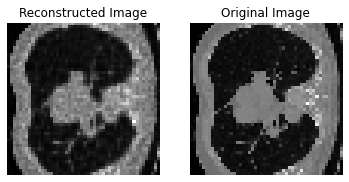

In [19]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(x_et.reshape(size, size), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_flat.reshape(size, size), cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

# functions

In [8]:
def intialize(y):
    x_start = np.zeros(M)
    for k, o in enumerate(y):
        aver = o/sum(A[k])
        x_start += A[k]*aver
        # print(k, o, aver)
    x_start = x_start/N
    return x_start

In [9]:
def em(A, y, x_old):
    z = np.zeros((N, M))
    for i in range(N):
        z[i] = y[i]*A[i]*x_old/sum(A[i]*x_old)
    x_new = np.zeros(M)
    for j in range(M):
        x_new[j] = sum(z[:, j])/(sum(A[:, j]))
    return x_new

In [13]:
def mle_em(max_iter, A, y, x_true=x_flat):
    x_old = intialize(y)
    mse = []
    for i in range(max_iter):
        x_new = em(A, y, x_old)
        mse = np.linalg.norm(x_new-x_true)
        diff = np.linalg.norm(x_new-x_old)
        if i%1 == 0:
            print(f'step: {i}, diff: {diff}, mse: {mse}')
        if diff < 1e-5:
            return x_new, diff, mse, i
        x_old = x_new
    return x_new, diff, mse, max_iter